### EDA Notebook 

In this notebook:
- Trailing whitespace removed from column name
- Summary statistics for all numeric features
- Density plots for all numeric features 
- Count distribution plots for all categorical features

In [2]:
import pandas as pd

df = pd.read_csv("paddydataset.csv")
df.columns.tolist()
df2 = df.rename(columns={'Hectares ': 'Hectares'})
df2.columns.tolist()

#df2.to_csv('paddyclean.csv',index=False)
df2.columns.tolist()

['Hectares',
 'Agriblock',
 'Variety',
 'Soil Types',
 'Seedrate(in Kg)',
 'LP_Mainfield(in Tonnes)',
 'Nursery',
 'Nursery area (Cents)',
 'LP_nurseryarea(in Tonnes)',
 'DAP_20days',
 'Weed28D_thiobencarb',
 'Urea_40Days',
 'Potassh_50Days',
 'Micronutrients_70Days',
 'Pest_60Day(in ml)',
 '30DRain( in mm)',
 '30DAI(in mm)',
 '30_50DRain( in mm)',
 '30_50DAI(in mm)',
 '51_70DRain(in mm)',
 '51_70AI(in mm)',
 '71_105DRain(in mm)',
 '71_105DAI(in mm)',
 'Min temp_D1_D30',
 'Max temp_D1_D30',
 'Min temp_D31_D60',
 'Max temp_D31_D60',
 'Min temp_D61_D90',
 'Max temp_D61_D90',
 'Min temp_D91_D120',
 'Max temp_D91_D120',
 'Inst Wind Speed_D1_D30(in Knots)',
 'Inst Wind Speed_D31_D60(in Knots)',
 'Inst Wind Speed_D61_D90(in Knots)',
 'Inst Wind Speed_D91_D120(in Knots)',
 'Wind Direction_D1_D30',
 'Wind Direction_D31_D60',
 'Wind Direction_D61_D90',
 'Wind Direction_D91_D120',
 'Relative Humidity_D1_D30',
 'Relative Humidity_D31_D60',
 'Relative Humidity_D61_D90',
 'Relative Humidity_D91_D12

In [3]:
hectares = df2["Hectares"]
# Calculate mean and standard deviation
mean_hectares = hectares.mean()
std_hectares = hectares.std()

print(f"Mean Hectares: {mean_hectares:.2f}")
print(f"Standard Deviation of Hectares: {std_hectares:.2f}")

Mean Hectares: 3.72
Standard Deviation of Hectares: 1.44


In [4]:
# soil types 
soil_types = df2['Soil Types'].unique()
soil_counts = df2["Soil Types"].value_counts()

soil_counts

Soil Types
clay        1521
alluvial    1268
Name: count, dtype: int64

In [11]:
# ----- summary statistics for numeric features ------
# mean, median, std dev 
# create new df of numeric type 
numeric_df = df2.select_dtypes(include='number')
# numeric_df.head()

# creates df of summary stats for numeric 
summary = numeric_df.describe().loc[['mean', '50%', 'std']]
summary.index = ['Mean', 'Median', 'Std Dev']
summary

,Hectares,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,...,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
Mean,3.717461,92.936536,46.468268,74.349229,3.717461,148.698458,7.434923,100.854729,38.587250,55.761922,...,7.233417,8.512729,8.172822,9.449265,76.256938,87.594120,85.160272,83.859448,335.510936,22517.728935
Median,4.000000,100.000000,50.000000,80.000000,4.000000,160.000000,8.000000,108.520000,41.520000,60.000000,...,8.000000,10.000000,8.000000,10.000000,72.700000,91.000000,84.000000,84.000000,360.000000,24636.000000
Std Dev,1.437777,35.944420,17.972210,28.755536,1.437777,57.511072,2.875554,39.006885,14.924123,21.566652,...,2.566549,3.203679,1.993596,2.516664,8.001361,6.776736,3.492529,3.134875,134.314772,9199.661393


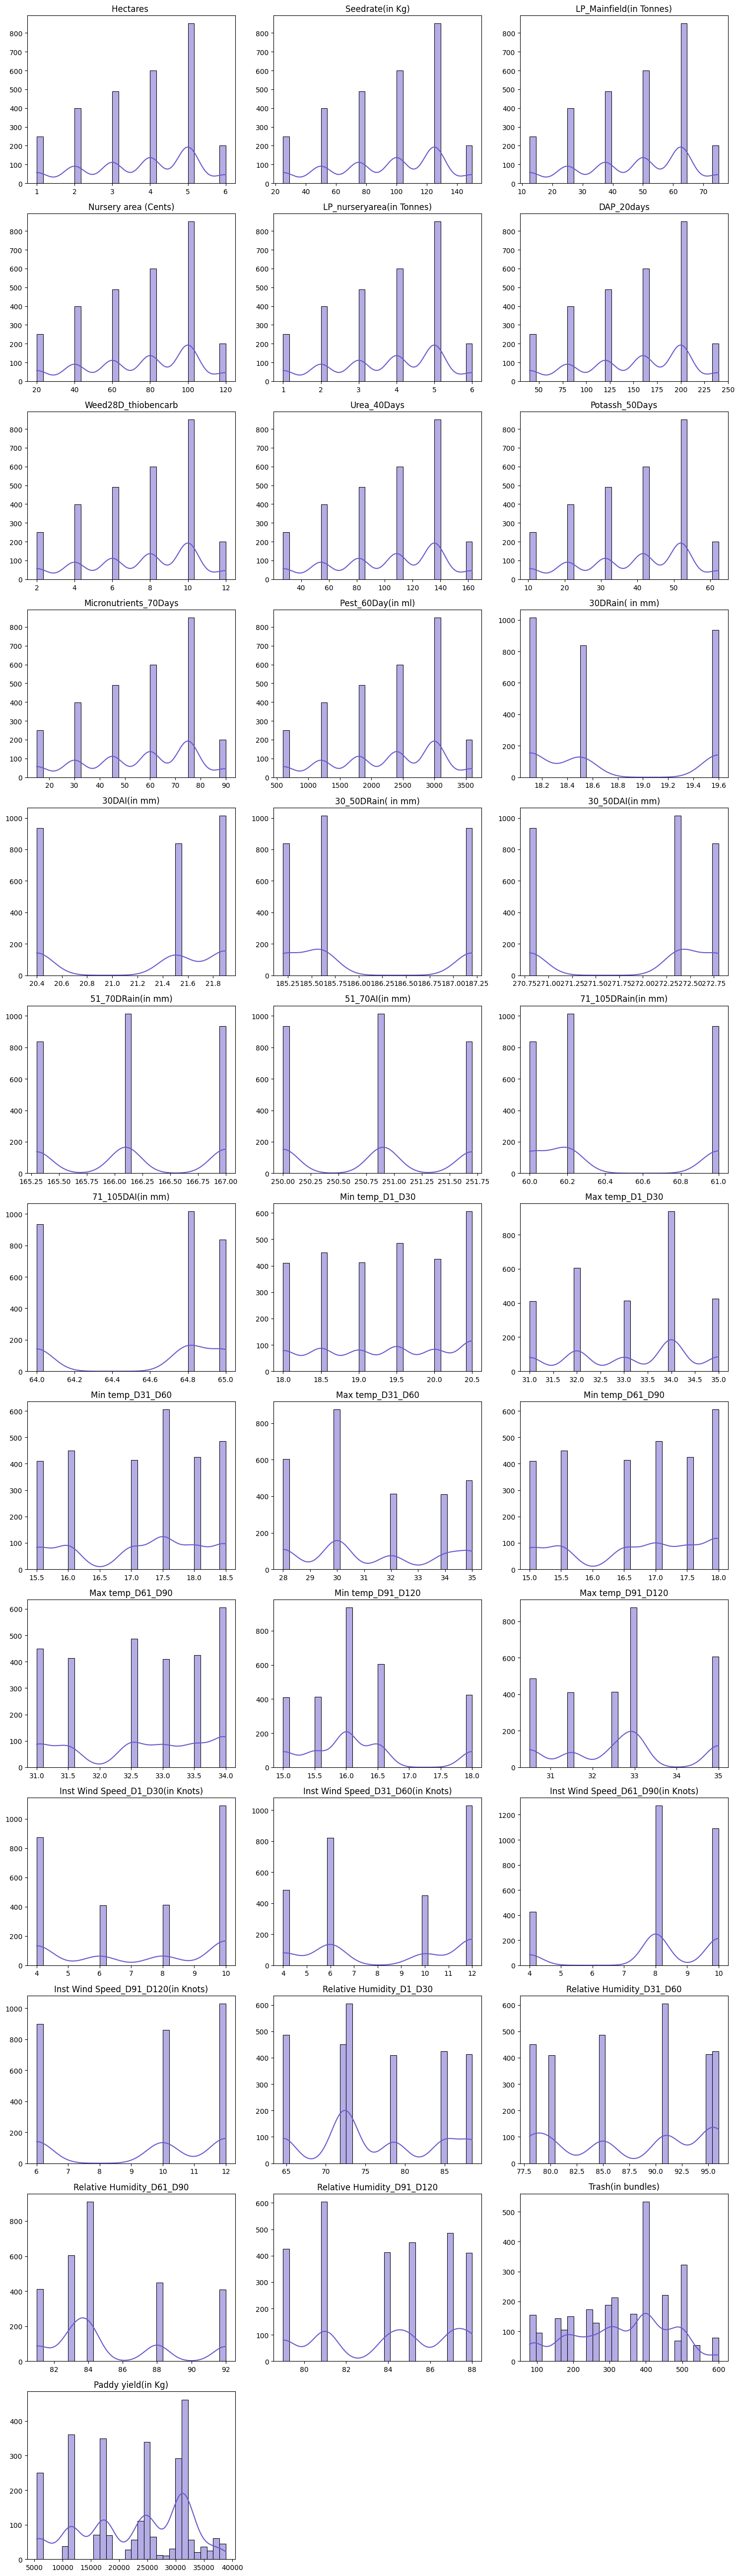

In [14]:
# ----- summary stats Numeric contd. (distribution visualization)  -------
import seaborn as sns
import matplotlib.pyplot as plt
import math

numeric_cols = df.select_dtypes(include='number').columns
n = len(numeric_cols)

rows = math.ceil(n/3)

plt.figure(figsize=(15, 4*rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='slateblue')
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()



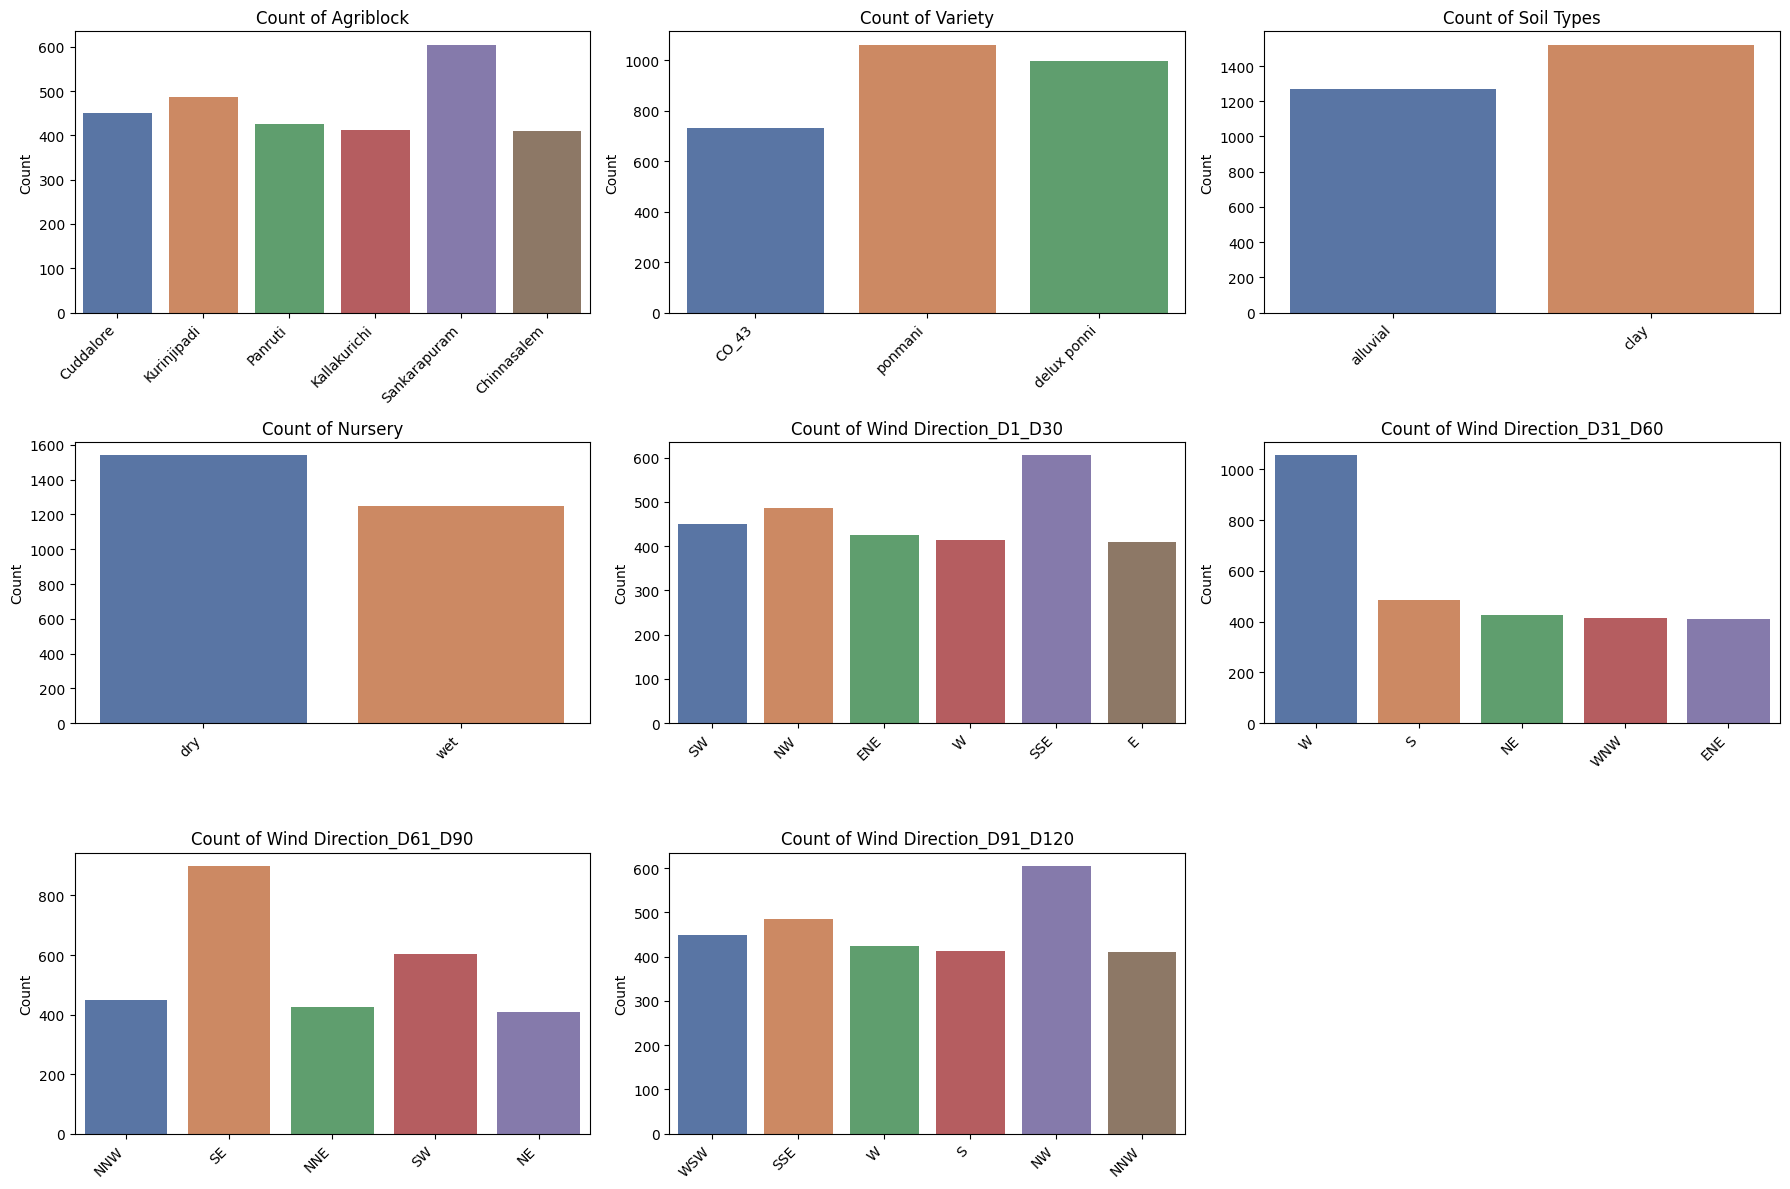

In [18]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols
# 8 categorical columns 

# ----- Categorical Vis: counts -----------------

import seaborn as sns
import matplotlib.pyplot as plt
import math

# count (8)
n = len(categorical_cols)

# Grid size: 3 columns wide
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, palette='deep', hue=col, legend=False)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("")   
    plt.ylabel("Count")

plt.tight_layout()
plt.show()
